In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingBelgium.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,1175,2014-02-25,Belgium,50.842035,4.410909,2.0,1.0,1.0,1.0,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
1,1176,2015-12-07,Belgium,50.827329,4.409106,2.0,1.0,1.0,1.0,75.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,12
2,1178,2015-09-17,Belgium,50.832687,4.440633,2.0,1.5,1.0,1.0,60.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,9
3,4904,2014-04-03,Belgium,50.830800,4.334302,6.0,1.5,2.0,4.0,139.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4
4,4906,2015-06-09,Belgium,50.828760,4.337271,2.0,1.0,1.0,1.0,35.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,494358,2012-06-08,Belgium,51.193292,4.411891,4.0,1.0,2.0,2.0,75.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6
5924,494359,2016-05-06,Belgium,51.206691,4.384524,1.0,1.0,1.0,1.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,5
5925,494379,2015-01-13,Belgium,51.194673,4.420456,13.0,3.0,5.0,8.0,350.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
5926,494380,2013-12-25,Belgium,51.205622,4.432557,2.0,1.0,1.0,1.0,65.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,12


<AxesSubplot:ylabel='Frequency'>

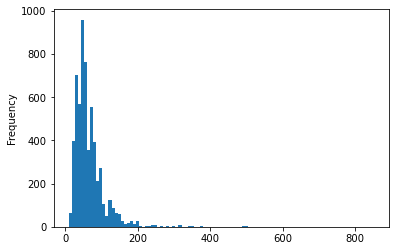

In [2]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [3]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,1175,2014-02-25,Belgium,50.842035,4.410909,2.0,1.0,1.0,1.0,26.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2,group_1
1,1176,2015-12-07,Belgium,50.827329,4.409106,2.0,1.0,1.0,1.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,12,group_2
2,1178,2015-09-17,Belgium,50.832687,4.440633,2.0,1.5,1.0,1.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,9,group_2
3,4904,2014-04-03,Belgium,50.830800,4.334302,6.0,1.5,2.0,4.0,139.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4,group_3
4,4906,2015-06-09,Belgium,50.828760,4.337271,2.0,1.0,1.0,1.0,35.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,6,group_1


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [5]:
train['group'].value_counts() / len(train)

group_1    0.449599
group_2    0.432940
group_3    0.082876
group_4    0.021299
group_5    0.013286
Name: group, dtype: float64

In [6]:
test['group'].value_counts() / len(test)

group_1    0.449410
group_2    0.433390
group_3    0.082631
group_4    0.021079
group_5    0.013491
Name: group, dtype: float64

In [7]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
2992,233783,2014-06-05,Belgium,50.854334,4.387315,4.0,1.0,2.0,4.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,6
4366,332762,2013-07-08,Belgium,51.198855,4.400637,5.0,2.5,3.0,4.0,200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,7
619,20829,2013-07-17,Belgium,51.178872,4.363008,4.0,1.0,2.0,2.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,7
1009,86163,2012-09-06,Belgium,51.229792,4.444637,2.0,2.0,1.0,2.0,45.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,9
3377,282504,2014-09-05,Belgium,50.837584,4.347785,2.0,1.0,1.0,1.0,53.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,9


In [8]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
1434,50.815402,4.351518,2.0,1.0,1.0,1.0,99.0,1.0,0.0,5.0,365.0,4.0,1.0,0.0,0.0,6,1
1299,51.194744,4.413748,4.0,1.5,2.0,2.0,75.0,1.0,15.0,2.0,15.0,1.0,1.0,0.0,0.0,1,10
4445,50.835443,4.359406,2.0,1.0,1.0,1.0,55.0,1.0,0.0,2.0,1125.0,7.0,1.0,0.0,0.0,3,3
4131,50.837699,4.467164,2.0,1.0,1.0,1.0,39.0,1.0,0.0,1.0,1125.0,1.0,1.0,0.0,0.0,6,3
2022,50.844545,4.352761,2.0,1.0,1.0,1.0,80.0,1.0,0.0,3.0,1125.0,122.0,1.0,0.0,0.0,2,3


In [9]:
train_y = train[['Price']]
train_y.head()

,Price
2992,50.0
4366,200.0
619,50.0
1009,45.0
3377,53.0


In [10]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
2992,50.854334,4.387315,4.0,1.0,2.0,4.0,3.0,5.0,2.0,2.147484e+09,37.0,1.0,0.0,0.0,3,6
4366,51.198855,4.400637,5.0,2.5,3.0,4.0,1.0,0.0,2.0,1.125000e+03,97.0,1.0,0.0,0.0,0,7
619,51.178872,4.363008,4.0,1.0,2.0,2.0,2.0,15.0,2.0,1.125000e+03,33.0,1.0,0.0,0.0,2,7
1009,51.229792,4.444637,2.0,2.0,1.0,2.0,1.0,5.0,1.0,1.125000e+03,18.0,0.0,1.0,0.0,3,9
3377,50.837584,4.347785,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1.125000e+03,8.0,1.0,0.0,0.0,4,9


In [11]:
test_y= test[['Price']]
test_y.head()

,Price
1434,99.0
1299,75.0
4445,55.0
4131,39.0
2022,80.0


In [12]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
1434,50.815402,4.351518,2.0,1.0,1.0,1.0,1.0,0.0,5.0,365.0,4.0,1.0,0.0,0.0,6,1
1299,51.194744,4.413748,4.0,1.5,2.0,2.0,1.0,15.0,2.0,15.0,1.0,1.0,0.0,0.0,1,10
4445,50.835443,4.359406,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1125.0,7.0,1.0,0.0,0.0,3,3
4131,50.837699,4.467164,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,1.0,1.0,0.0,0.0,6,3
2022,50.844545,4.352761,2.0,1.0,1.0,1.0,1.0,0.0,3.0,1125.0,122.0,1.0,0.0,0.0,2,3


In [13]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [17]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [20]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [23]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [26]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_18228/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

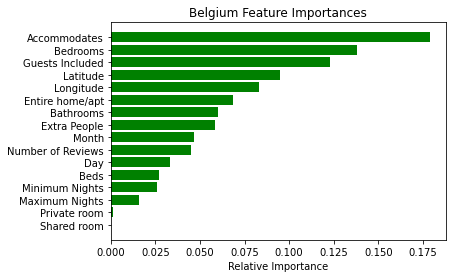

In [29]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Belgium Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [30]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

135.77845776043864 11.652401373126427 6.478167439898777


In [31]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [32]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [33]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)